# CAPM - Capital Asset Pricing Model 

Watch the video for the full overview.

Portfolio Returns:

## $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$

Market Weights:

## $ w_i = \frac{MarketCap_i}{\sum_{j}^{n}{MarketCap_j}} $


### CAPM of a portfolio


## $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

In [1]:
# Model CAPM as a simple linear regression

In [2]:
from scipy import stats

In [3]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

In [4]:
import pandas as pd

In [5]:
import pandas_datareader as web

In [7]:
spy_etf = web.DataReader('SPY','yahoo')

In [8]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-04-24 to 2022-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 68.9 KB


In [9]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-24,237.410004,234.559998,237.179993,237.169998,119209900.0,217.335434
2017-04-25,238.949997,237.809998,237.910004,238.550003,76698300.0,218.600037
2017-04-26,239.529999,238.350006,238.509995,238.399994,84702500.0,218.462524
2017-04-27,238.949997,237.979996,238.770004,238.600006,57410300.0,218.645874
2017-04-28,238.929993,237.929993,238.899994,238.080002,63532800.0,218.169312


In [11]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-18,439.750000,435.609985,436.809998,437.970001,66002500.0,437.970001
2022-04-19,445.799988,437.679993,437.859985,445.040009,77821000.0,445.040009
2022-04-20,447.570007,443.480011,446.920013,444.709991,65224400.0,444.709991
2022-04-21,450.010010,437.100006,448.540009,438.059998,85417300.0,438.059998
2022-04-22,438.079987,425.440002,436.910004,426.040009,132354400.0,426.040009


In [13]:
start = pd.to_datetime('2017-04-24')
end = pd.to_datetime('2022-04-22')

In [14]:
aapl = web.DataReader('AAPL','yahoo',start,end)

In [15]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.904774
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.114853
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.914215
2017-04-27,36.040001,35.827499,35.980000,35.947498,56985200.0,33.940186
2017-04-28,36.075001,35.817501,36.022499,35.912498,83441600.0,33.907146


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

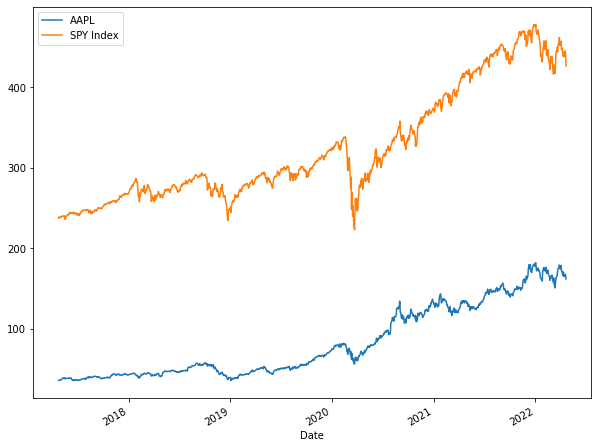

In [17]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend();

## Compare Cumulative Return

In [18]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

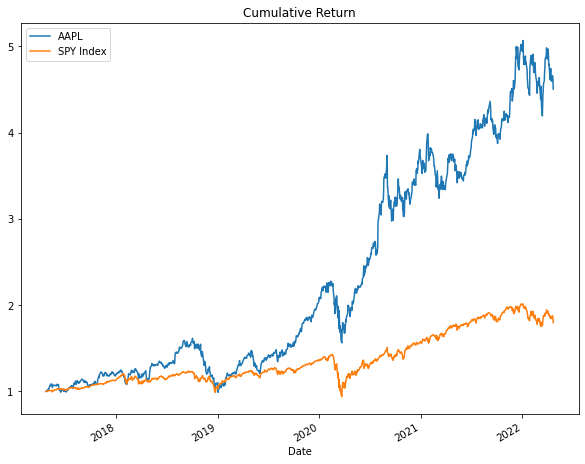

In [19]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
plt.title('Cumulative Return')

## Get Daily Return

In [20]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

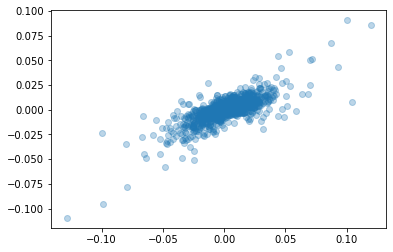

In [22]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.3);

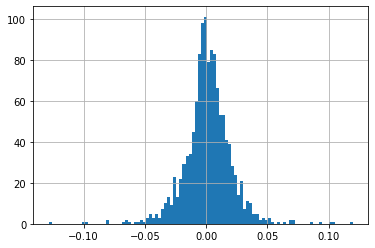

In [24]:
aapl['Daily Return'].hist(bins=100);

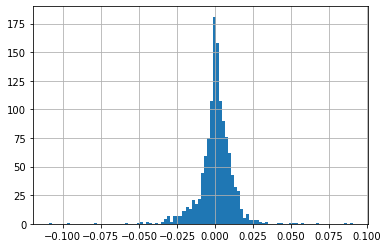

In [25]:
spy_etf['Daily Return'].hist(bins=100);

In [26]:
beta, alpha, r_value, p_value, std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [27]:
beta

0.48543427671789563

In [28]:
alpha

-0.00013236620937053239

In [29]:
r_value

0.7725095718990597

## What if our stock was completely related to SP500?

In [30]:
spy_etf['Daily Return'].head()

Date
2017-04-24         NaN
2017-04-25    0.005819
2017-04-26   -0.000629
2017-04-27    0.000839
2017-04-28   -0.002179
Name: Daily Return, dtype: float64

In [31]:
import numpy as np

In [34]:
noise = np.random.normal(0, 0.001, len(spy_etf['Daily Return'].iloc[1:]))

In [35]:
noise

array([-0.00089644, -0.00063495,  0.00019842, ...,  0.00061548,
       -0.00197713, -0.00095022])

In [36]:
spy_etf['Daily Return'].iloc[1:] + noise

Date
2017-04-25    0.004922
2017-04-26   -0.001264
2017-04-27    0.001037
2017-04-28   -0.003225
2017-05-01    0.001752
                ...   
2022-04-18    0.000176
2022-04-19    0.017039
2022-04-20   -0.000126
2022-04-21   -0.016931
2022-04-22   -0.028389
Name: Daily Return, Length: 1259, dtype: float64

In [37]:
beta, alpha, r_value, p_value, std_err = stats.linregress(spy_etf['Daily Return'].iloc[1:]+noise, spy_etf['Daily Return'].iloc[1:])

In [38]:
beta

0.9895636391390584

In [39]:
alpha

4.477879738216473e-05